In [88]:
import numpy as np 
import matplotlib.pyplot as plt 
from n_arm_bandit import NArmedBandit
from agent import BanditAgent
from environment import BanditEnvironment
import matplotlib.pyplot as plt

In [89]:
history = np.load("./history.npy")
rewards = np.load("./rewards.npy")
actions = np.load("./actions.npy")
mean_deviations = np.load("./mean_deviation_pairs.npy")
value_table = np.load("./value_table.npy")
greedy = np.load("./greedy.npy")

domain = np.arange(0, 1000, 1)

# Training 

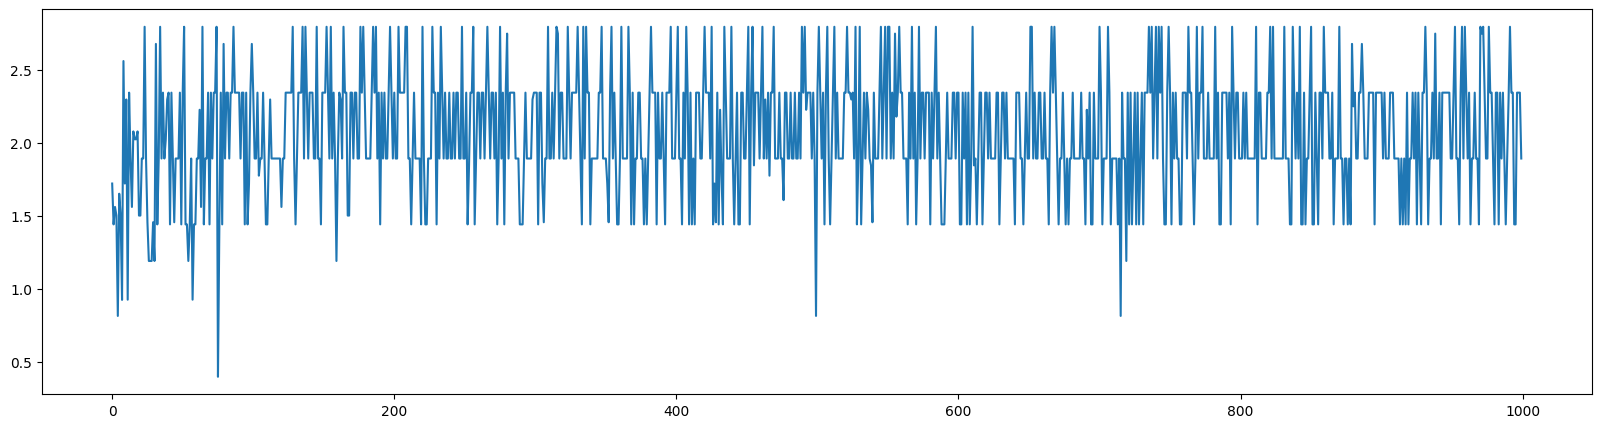

In [90]:
plt.figure(figsize=(20, 5))
plt.plot(domain, history)

In [91]:
reward_types, reward_type_counts = np.unique(history, return_counts=True)

<BarContainer object of 29 artists>

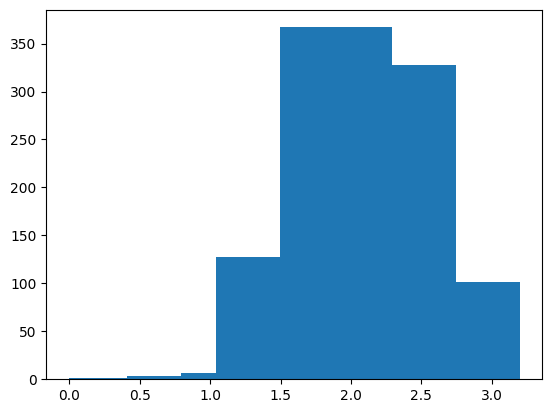

In [92]:
plt.bar(reward_types, reward_type_counts)

# Actions

In [93]:
actions

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 0, 1, 1, 2, 3, 5, 5, 6, 3, 6, 8,
       8, 8, 8, 9, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 5, 8, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 0, 1, 1, 1, 1, 8, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 6, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [94]:
action_types, counts = np.unique(actions, return_counts=True) 

<BarContainer object of 10 artists>

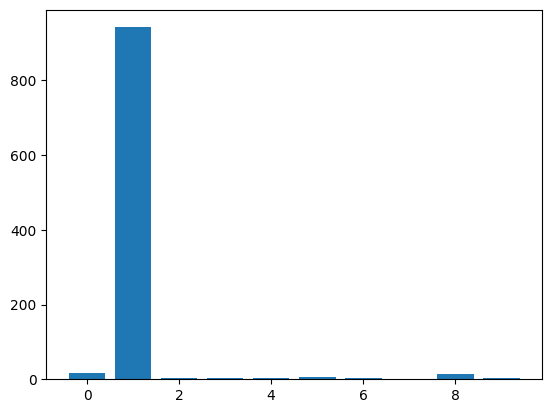

In [95]:
plt.bar(action_types, counts)

# Rewards

In [96]:
rewards

array([0.81461909, 0.93215283, 0.48047404, 0.88524604, 0.30836462,
       0.57384936, 0.72564887, 0.76942911, 0.0221503 , 0.13214568])

# Value table

In [97]:
value_table

array([1.3675685, 2.0953457, 1.3741889, 1.6461957, 1.0628227, 1.8427491,
       1.6461957, 0.660081 , 2.2793498, 1.4560633], dtype=float32)

In [98]:
mean_deviations

array([[5.        , 0.05121836],
       [2.        , 0.35910232],
       [8.        , 0.14322478],
       [4.        , 0.85955707],
       [8.        , 0.21310013],
       [6.        , 0.92637888],
       [4.        , 0.38362111],
       [9.        , 0.78955891],
       [2.        , 0.72514961],
       [5.        , 0.61929294]])

In [99]:
np.argmax(value_table) 

8

# Greedy 

In [100]:
greedy

array([], dtype=float64)

# Test reward and distribution

In [101]:
true_reward = np.zeros(10) 

for symbol, (mean, deviation) in enumerate(mean_deviations): 
    for i in range(1000): 
        random_numbers = np.random.normal(
            loc=mean, scale=deviation, size=3)
        random_indices = [np.abs(int(np.floor(num % 10)))
                          for num in random_numbers]

        for random_index in random_indices: 
            true_reward[symbol] += rewards[random_index]
        

In [102]:
true_reward = true_reward / 1000

In [103]:
true_reward

array([1.31509094, 2.12021731, 1.16046708, 1.75292733, 1.17167626,
       1.84886153, 1.79760269, 0.71269336, 2.19060472, 1.4252255 ])